# Keras で MNIST
## softmaxのみ


In [2]:
from inputform import input_form, javascript
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, CSVLogger
from inputform import javascript, input_form

Using TensorFlow backend.


In [3]:
batch_size = 50   # バッチサイズ
num_classes = 10  # 分類クラス数　数字認識なので10
epochs = 5 #  学習の繰り返し回数　

# MNISTデータの読み込み
```
(images, labels), (timages, tlabels) = mnist.load_data()
images = images.reshape(60000, 784).astype('float32')
timages = timages.reshape(10000, 784).astype('float32')
images /= 255  # tensorflow と違って keras で読み込んだ MNISTデータは画素が１バイトの整数表現されている
timages /= 255
labels = keras.utils.to_categorica(labels,10)  # keras の MNISTのラベルデータは整数
tlabels = keras.utils.to_categorica(tlabels,10)```

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
images = mnist.train.images
labels = mnist.train.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


# モデル定義


In [5]:
model = Sequential()
model.add(Dense(10, input_dim=784))
model.add(Activation('softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# 学習の定義

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

Optimizerについては
https://keras.io/ja/optimizers/

In [8]:
es = EarlyStopping(monitor='val_loss', patience=2)   #  検証用データのロスが改善されなくなったら2エポック後に停止
# tb_cb = keras.callbacks.TensorBoard(log_dir='tblog', histogram_freq=1)
csv_logger = CSVLogger('training.log')
hist = model.fit(images, labels,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1, # 10 % は検証用に利用する
                 # callbacks=[es, csv_logger,tb_cb])
                 callbacks=[es, csv_logger])

Train on 49500 samples, validate on 5500 samples
Epoch 1/5
49500/49500 [==============================] - 5s - loss: 0.5555 - acc: 0.8589 - val_loss: 0.2904 - val_acc: 0.9224
Epoch 2/5
49500/49500 [==============================] - 5s - loss: 0.3352 - acc: 0.9066 - val_loss: 0.2522 - val_acc: 0.9316
Epoch 3/5
49500/49500 [==============================] - 4s - loss: 0.3051 - acc: 0.9155 - val_loss: 0.2384 - val_acc: 0.9347
Epoch 4/5
49500/49500 [==============================] - 4s - loss: 0.2911 - acc: 0.9189 - val_loss: 0.2337 - val_acc: 0.9358
Epoch 5/5
49500/49500 [==============================] - 5s - loss: 0.2825 - acc: 0.9202 - val_loss: 0.2310 - val_acc: 0.9360


test loss: 0.272798455432
test acc: 0.9237


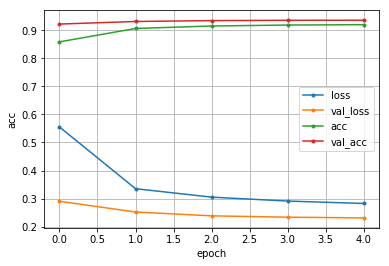

In [9]:
timages = mnist.test.images
tlabels = mnist.test.labels# evaluate model
score = model.evaluate(timages, tlabels, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])

# plot results
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

# 手書き文字のオンライン認識

In [10]:
def testeval():
    input = np.array(testimg,dtype=np.float32).reshape(1,784)
    inputasimg = input.reshape(28,28)
    output = model.predict(input)[0]
    fig = plt.figure(figsize=(8,2))
    subplot = fig.add_subplot(1,2,1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(inputasimg,cmap=plt.cm.binary)
    subplot = fig.add_subplot(1,2,2)
    subplot.set_xlim(-0.5,9.5)
    subplot.set_ylim(0,1)
    subplot.bar(range(10),output, align='center')
    print("It may be {}".format(np.argmax(output)) )

In [11]:
HTML(input_form + javascript)

""
消去


It may be 8


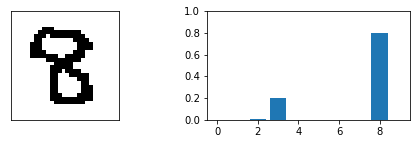

In [12]:
testeval()

It may be 0


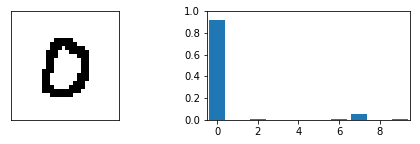

In [13]:
testeval()

In [1]:
# inputform.py
input_form = """
<table>
<tr>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
</tr>
<tr>
<td style="border-style: none;"  align="left" >
<button onclick="clear_value()">消去</button>
</td>
</tr>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;

    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            y = Math.floor(e.offsetY * 0.2)
            x = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(x+dx)+(y+dy)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("testimg = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
    
</script>
"""

